<h1><center>SILKROAD 2 <br>
Analyzing the illegal drugsmarket hiding behind the Darknet<center><h1>

<img src='http://i.dailymail.co.uk/i/pix/2013/10/03/article-2442336-187DD1FC00000578-93_634x472.jpg'/ width=500px length=500px>

Dataset used from https://www.gwern.net/DNM%20archives

## 1: Imports and setting up the file-directories

In [47]:
# Imports
import os 
from bs4 import BeautifulSoup
import re
from collections import defaultdict
import operator
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import chain
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
# Find all the directories to parse files in.
first_dir= '2014-08-30-categories'
final_dir= []
all_items= []

for filename in os.listdir(first_dir):
    if filename.startswith('.') is not True:   # Skip the .DS Store file
        if filename.startswith('drugs'):
            naam=str(filename)
            final_dir.append(first_dir+'/'+naam) # All drug related directories

for files in final_dir:
    for filename in os.listdir(files):
        all_items.append(files+'/'+filename)

## 2: Function that extracts the shipping data

In [3]:
shipping = defaultdict(list)     # contains the shipping from and to

def find_shipping_information(filepath):
    
    ''' This function takes a file(path)
    as parameter and returns the corresponding
    shipping data. The keys in the dictionary 
    depict which country is shipped from, where
    the values are the possible shipping countries.
    '''
    
    soup = BeautifulSoup(open(filepath),"lxml")                # Open file with soup and initialize lists
    shipping_tags=[]
    shipping_tags_no_whitespace= []
    
    try:
        find_shipping= soup.findAll('div', {'class' :'shipping'})  # Find all shipping divs and extract text
        for x in find_shipping:
             shipping_tags.append(x.text)

        for y in shipping_tags:                                    # Remove unneccesary whitespaces
            shipping_tags_no_whitespace.append(" ".join(y.split()))

        for z in shipping_tags_no_whitespace:           # Find the shipping country, and the countries shipped to
            find_shipping_from= re.findall(r'(?<=ships from:)(.*)(?=ships to:)',z)
            find_shipping_to= re.findall("ships to: (.*)", z)
            for x in find_shipping_from:
                for y in find_shipping_to:            
                    shipping[x].append(y)     

    except:
        pass

In [4]:
for files in all_items:                # Run the function over all files in the directories
    find_shipping_information(files)
    
shipped_from_countries= shipping.keys()   # Create a dictionary including number of advertisements per country 
count_advertisements_per_country= {}

for country in shipped_from_countries:
    number= len(shipping.get(country))
    count_advertisements_per_country[country]=number

sorted_by_advertisements = sorted(count_advertisements_per_country.items(), key=operator.itemgetter(1),reverse=True)

## 3: Plotting the number of drug advertisements per export country on Silkroad 2

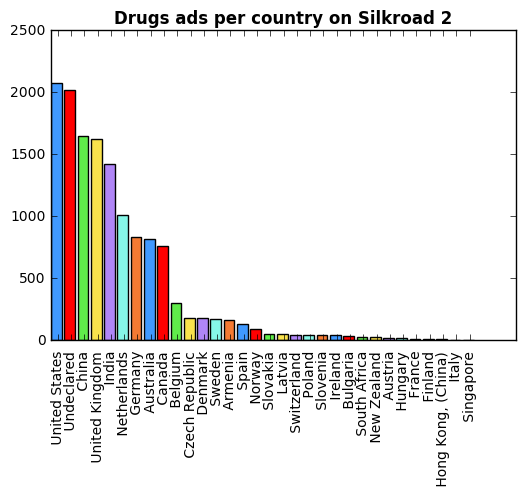

In [5]:
labels, values = zip(*sorted_by_advertisements)
indexes = np.arange(len(labels))
width = 1
colors = ['#4099FF', 'r', '#60EC4A', '#F9E24C', '#B086F7', '#86F7E8', '#F47A33']
plt.bar(indexes, values, color=colors)
plt.xticks(indexes + width * 0.5, labels,rotation=90)
plt.title('Drugs ads per country on Silkroad 2', weight='bold')
plt.show()

## 4. Function that finds all vendors and their corresponding country

In [34]:
vendors = defaultdict(list)     # contains the vendors and their presumable home country

def find_vendors_with_country(filename):
    soup = BeautifulSoup(open(filename),"lxml")                # Open file with soup and initialize lists and dicts
    find_item= soup.findAll('div', {'class' :'item'})
    for x in find_item:
        vendor=[]
        shipping=[]
        find_vendor= x.findAll('div', {'class' :'vendor'})  # Find vendor
        for vend in find_vendor:
            vendor_list= vend.text.split()[:-1]         # remove 'sold by' and 'rating', only keep usernames
            target_ibdex= vendor_list.index('by')
            vendor.append(vendor_list[target_ibdex+1:])

        find_shipping= x.findAll('div', {'class' :'shipping'})  # Find all shipping divs and extract text
        for ship in find_shipping:
            ship_list=[]
            ship2=ship.text
            ship3= " ".join(ship2.split())
            find_shipping_from= re.findall(r'(?<=ships from:)(.*)(?=ships to:)',ship3)
            ship_list.append(find_shipping_from)
            shipping_from= list(chain.from_iterable(ship_list))
            shipping.append(shipping_from)

        vendor= list(chain.from_iterable(vendor))
        shipping= list(chain.from_iterable(shipping))
        for key, value in zip(vendor, shipping):
            if value != ' Undeclared ':
                vendors[key].append(value)

In [35]:
for files in all_items:                # Run the function over all files in the directories
    find_vendors_with_country(files)

In [38]:
pd.DataFrame(vendors.items(), columns=['Vendor', 'Country']).head(10)

,Vendor,Country
0,Bisto,"[ United Kingdom , United Kingdom , United K..."
1,elpico,"[ Netherlands , Netherlands , Netherlands , ..."
2,KeithLemon,"[ United Kingdom , United Kingdom , United K..."
3,ThreeKings,"[ Poland , Poland , Latvia , Latvia , Latv..."
4,Flyfelix,"[ Slovenia , Slovenia , Slovenia , Slovenia..."
5,AussiePrime,"[ Australia , Australia , Australia , Austr..."
6,TheWolfOfSR,"[ United States , United States , United Sta..."
7,LoveUnderWill,"[ United States , United States , United Sta..."
8,Q-Dance,"[ Sweden , Sweden , Sweden , Sweden ]"
9,CMOT,"[ United States , United States , United Sta..."


In [39]:
US= ' United States '           # Calculate the number of unique sellers for the top 5 countries
NL= ' Netherlands '
CH= ' China '
UK= ' United Kingdom '
IN= ' India '
number_of_sellers_by_country= {US:0, NL:0, CH:0, UK:0, IN:0}

for k,v in vendors.iteritems():
    if US in v:
        number_of_sellers_by_country[US]+= 1
    if NL in v:
        number_of_sellers_by_country[NL]+= 1
    if CH in v:
        number_of_sellers_by_country[CH]+= 1
    if UK in v:
        number_of_sellers_by_country[UK]+= 1
    if IN in v:
        number_of_sellers_by_country[IN]+= 1

sorted_by_sellers = sorted(number_of_sellers_by_country.items(), key=operator.itemgetter(1),reverse=True)

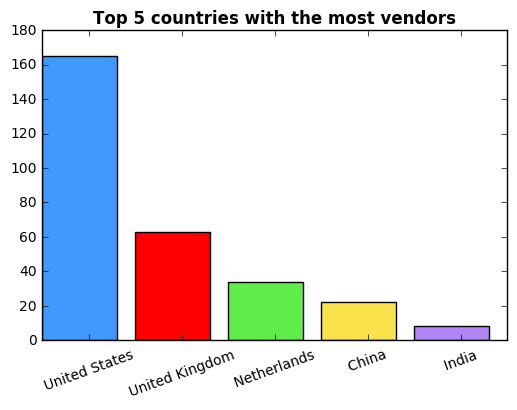

In [40]:
labels, values = zip(*sorted_by_sellers)
indexes = np.arange(len(labels))
width = 1
colors = ['#4099FF', 'r', '#60EC4A', '#F9E24C', '#B086F7', '#86F7E8', '#F47A33']
plt.bar(indexes, values, color=colors)
plt.xticks(indexes + width * 0.5, labels,rotation=20)
plt.title('Top 5 countries with the most vendors', weight='bold')
plt.show()

## 5. Most expensive product

In [41]:
prices_by_title = defaultdict(list)     # contains product-titles and their price

def find_most_expensive_product(filename):
    soup = BeautifulSoup(open(filename),"lxml")             # Open file with soup and initialize lists and dicts
    find_item= soup.findAll('div', {'class' :'item'})
    
    price= []
    title=[]
    for x in find_item:
        find_price= x.findAll('div', {'class' :'price'})  # Find price
        find_title= x.findAll('div', {'class' :'item_title'})  # Find title
        for x in find_price:
            price.append(x.text)
        for y in find_title:
            title.append(y.text)       
       
        for t, p in zip(title, price):
            prices_by_title[t]= (p)

In [12]:
for files in all_items:                # Run the function over all files in the directories
    find_most_expensive_product(files)

### Top 5 most expensive drugs-related products

In [15]:
for k,v in prices_by_title.iteritems():
    prices_by_title[k] = v.encode('ascii','ignore')   # ASCII does not support the Bitcoin sign, so ignore.
    
price_df= pd.DataFrame(prices_by_title.items(), columns=['Advertisement Title', 'Price in Bitcoins']) # Create df
price_df2= price_df.sort_values('Price in Bitcoins',ascending=False)
price_df2= price_df2.drop(127)
price_df2.head()

,Advertisement Title,Price in Bitcoins
4583,1kg Highest Purity Cocaine - Direct From Colombia,99.009906
6741,1500 grams of pure butylone (bk-MBDB),9.978070
384,100 doses LSD Strong 150 ug,9.962634
6858,1000 x LSD Blotter | 120ug Pure White LSD Xtal...,9.873641
1855,Norge: Unikt tilbud!! Standard marrokansk hasj...,9.856914


In [21]:
for index, row in price_df2.head().iterrows(): # Price from Bitcoin to Euro, valuta from day of coding 
    a= float(row['Price in Bitcoins'])* 980
    print '€', a

€ 97029.70788
€ 9778.5086
€ 9763.38132
€ 9676.16818
€ 9659.77572


## 6. Sentiment analysis over review data 
Note: The full NLTK Library has to be downloaded/installed in order to run the Sentiment analyzer without errors. Downloading the NLTK Library can be done by running 'nltk.download()' and download all components.

In [42]:
full_directory_name= []
for filename in os.listdir('2014-08-30-users'):           # Extract all file names in the users directory
    if 'feedback' in filename:
        full_directory_name.append('2014-08-30-users/'+filename)

In [50]:
reviews = defaultdict(list)     # contains the user with all corresponding reviews

def find_reviews_per_user(filename):
    
    soup = BeautifulSoup(open(filename),"lxml")
    username_with_questionmark= re.findall(r'(?<=2014-08-30-users/)(.*)(?=feedback)',filename) 
    username_in_list= ([s.strip('?') for s in username_with_questionmark])  # questionmark interpretated as re, 
                                                                            # so have to extract later
    username = ''.join(username_in_list)

    find_item= soup.findAll('div', {'class' :'feedbacks'})

    for x in find_item:
        find_td= x.findAll('td')
        for y in find_td:
            find_wrong_sections= y.find_all("div", {'class':'stars'})
            if len(find_wrong_sections) == 0:
                find_wrong_href= y.find_all('a', href=True)
                if len(find_wrong_href) == 0:
                    remove_date= y.text.split()
                    if 'days' not in remove_date:
                        if y.text not in reviews[username]:
                            reviews[username].append(y.text) 

In [51]:
for name in full_directory_name:
    find_reviews_per_user(name)

In [117]:
# Some example reviews
sentiment_per_user = defaultdict(list)     # contains the user with all corresponding reviews

positive= []
negative= []
neutral = []
c=0
sid = SentimentIntensityAnalyzer()
for x,y in reviews.iteritems():
    for item in y:
        ss = sid.polarity_scores(item)

        positive.append(ss.get('pos'))
        negative.append(ss.get('neg'))
        neutral.append(ss.get('neu'))

    positive_average= sum(positive) / len(positive)
    negative_average= sum(negative) / len(negative)
    neutral_average= sum(neutral) / len(neutral)

    sentiment_per_user[x].append(positive_average)
    sentiment_per_user[x].append(negative_average)
    sentiment_per_user[x].append(neutral_average)

### Vendors with 'the most' positive reviews (average)

In [118]:
sentiment_df= pd.DataFrame(sentiment_per_user.items(),  columns=['Vendor', 'Sentiment'])

sentiment_df[['Pos','Neg', 'Neu']] = pd.DataFrame([x for x in sentiment_df.Sentiment])
sentiment_df = sentiment_df.drop('Sentiment', axis=1)
sentiment_df_pos= sentiment_df.sort_values('Pos',ascending=False)
sentiment_df_neg= sentiment_df.sort_values('Neg',ascending=False)
sentiment_df_pos.head(10)

,Vendor,Pos,Neg,Neu
1,croix,0.437867,0.032970,0.529168
2,gammagoblin,0.418389,0.036897,0.542692
3,gold,0.417628,0.035888,0.544662
0,aidoneus,0.414945,0.038684,0.546386
4,right3ous,0.408735,0.039235,0.549942
166,theanchor,0.407731,0.040616,0.547118
8,es-light,0.406495,0.039968,0.548683
5,kings-habit,0.405635,0.040931,0.549635
73,sniffpod,0.405274,0.040071,0.548813
74,california-dreamin,0.405027,0.040187,0.548853


### Vendors with 'the most' negative reviews (average)

In [119]:
sentiment_df_neg.head(10)

,Vendor,Pos,Neg,Neu
44,drpsych,0.394382,0.044051,0.556358
49,magicted,0.397893,0.043802,0.553106
51,btcpal,0.397659,0.043778,0.553387
40,ringo-deathstarr,0.394664,0.043741,0.556646
41,albertheijn,0.394462,0.043652,0.556817
43,musafa,0.395135,0.043634,0.556094
14,abzu,0.403148,0.043358,0.548982
13,mahakala-2-0,0.403335,0.043357,0.549153
118,omnimodo-facturus,0.395458,0.043322,0.555820
52,nzt48givesyouwings,0.398370,0.043312,0.553100
